In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [43]:
with_mask_files = os.listdir('/content/drive/MyDrive/Projects/FaceMaskDetect/data/with_mask')
without_mask_files = os.listdir("/content/drive/MyDrive/Projects/FaceMaskDetect/data/without_mask")

In [44]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [45]:
len(without_mask_labels)

3828

In [46]:
len(with_mask_labels)

3725

In [47]:
labels = with_mask_labels + without_mask_labels

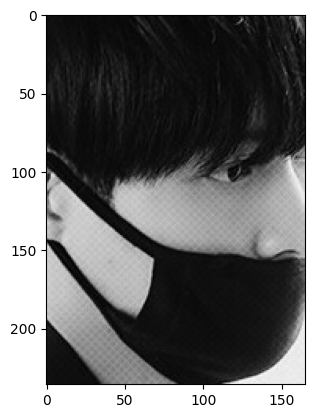

In [48]:
img = mpimg.imread('/content/drive/MyDrive/Projects/FaceMaskDetect/data/with_mask/with_mask_1003.jpg')
imgplot = plt.imshow(img)
plt.show()

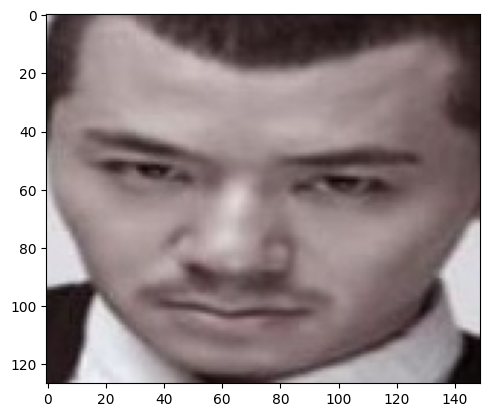

In [49]:
img = mpimg.imread('/content/drive/MyDrive/Projects/FaceMaskDetect/data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

In [50]:
with_mask_path = '/content/drive/MyDrive/Projects/FaceMaskDetect/data/with_mask/'

data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path+img_file) # cv2.imread(with_mask_path+img_file)

    image = image.resize((128,128)) # cv2.resize(image, (128,128))

    image = image.convert('RGB') # cv2.cvtColor(image, COLOR_BGR2RGB)

    image = np.array(image)
    data.append(image)

In [51]:
without_mask_path = '/content/drive/MyDrive/Projects/FaceMaskDetect/data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path+img_file) # cv2.imread(without_mask_path+img_file)

    image = image.resize((128,128)) # cv2.resize(image, (128,128))

    image = image.convert('RGB') # cv2.cvtColor(image, COLOR_BGR2RGB)

    image = np.array(image)
    data.append(image)

In [52]:
len(labels)

7553

In [53]:
len(data)

7553

In [54]:
data[0].shape

(128, 128, 3)

In [55]:
X = np.array(data)
Y = np.array(labels)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [57]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [59]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = "sigmoid"))

In [60]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [61]:
history = model.fit(X_train_scale, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 159s 922ms/step - acc: 0.7027 - loss: 0.6974 - val_acc: 0.8760 - val_loss: 0.2947
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 197s 895ms/step - acc: 0.8922 - loss: 0.2854 - val_acc: 0.8843 - val_loss: 0.2509
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 148s 873ms/step - acc: 0.9046 - loss: 0.2394 - val_acc: 0.8860 - val_loss: 0.2495
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 153s 903ms/step - acc: 0.9209 - loss: 0.2081 - val_acc: 0.8876 - val_loss: 0.2813
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 155s 910ms/step - acc: 0.9368 - loss: 0.1699 - val_acc: 0.9124 - val_loss: 0.2147


In [62]:
loss, accuracy = model.evaluate(X_test_scale, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - acc: 0.9403 - loss: 0.1550


In [63]:
print("Loss is: ",loss)
print("Accuracy is: ",accuracy)

Loss is:  0.1756778061389923
Accuracy is:  0.9318332076072693


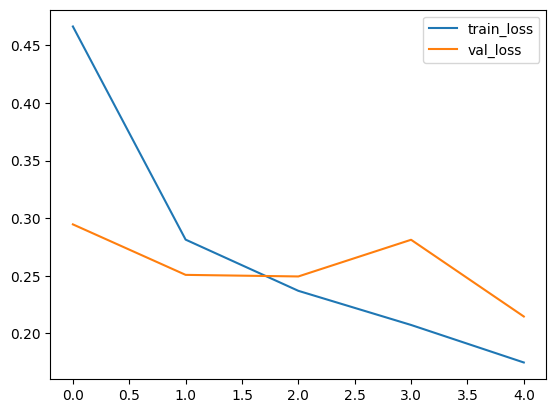

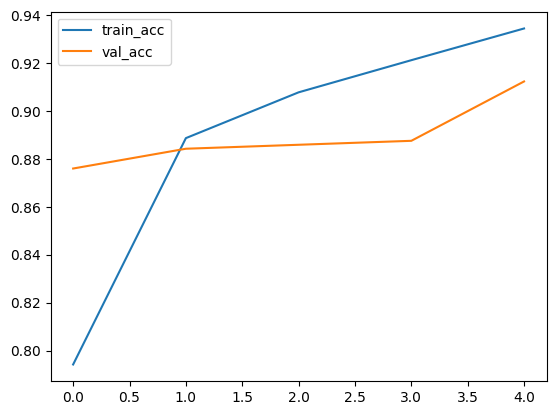

In [64]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()

In [65]:
model.save("model.h5")